# Postprocessing - observations

Section 1 - Import code and make definitions

Section 2 - running and viewing the observations

### before running for the first time you will need to execute Code Block 1 in TauP_plots.ipynb

## Section 1 - Import code and make definitions

In [1]:
# %matplotlib notebook
%matplotlib inline

# calculate the taup models
from obspy.taup import TauPyModel


calculated_VPREMOON = TauPyModel(model='VPREMOON_atten_taup')
calculated_ISSI_M1 = TauPyModel(model='ISSI_MOON_M1_atten_taup')

calculated_taup_dict =	{
  "VPREMOON_taup": calculated_VPREMOON,
  "ISSI_MOON_M1_taup": calculated_ISSI_M1,
}

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

from obspy.core import Stream, UTCDateTime
from obspy import read_inventory

from postprocessing_util_observations import get_observations_local
from postprocessing_util import plot_epicentral_distance_taup

phase_list_observations = ["P", "PS", "S"]

In [2]:
# location of the data 

catalogs=['input_files/Nunn_2024_artificial_impacts_picks.xml']

inv = read_inventory('input_files/local_MSEED/inventory.xml')

## Section 2 - running and viewing the observations 

In [3]:
model_taup = 'VPREMOON_taup'
original_observation_stream_local_MH = get_observations_local(channel='MH*',model_taup=calculated_taup_dict[model_taup],catalog=catalogs[0],inv=inv)
# original_observation_stream_local_SHZ = get_observations_local(channel='SHZ',model_taup=calculated_taup_dict[model_taup],catalog=catalogs[0],inv=inv)
# original_observation_stream_local_MH1 = get_observations_local(channel='MH1',model_taup=calculated_taup_dict[model_taup],catalog=catalogs[0],inv=inv)


A13/S-IVB 4.480908613215989
A14/S-IVB 5.783787517596895
A15/S-IVB 11.718510058287118
A15/S-IVB 6.118664372615061
A16/S-IVB 5.075044339909034
A16/S-IVB 9.054122437295218
A16/S-IVB 36.37690556827287
A17/S-IVB 11.13215379702135
A17/S-IVB 5.161473408558756
A17/S-IVB 34.01814904542429
A17/S-IVB 28.047339965833054
A12/LM 2.4252731172780972
A14/LM 3.8036577155384563
A14/LM 2.167025997371414
A15/LM 37.23510859020209
A15/LM 34.560784470873635
A15/LM 3.0396554713670882
A17/LM 57.67071530277473
A17/LM 52.68194068762792
A17/LM 25.432357813795228
A17/LM 32.487063821982076


In [4]:
print(original_observation_stream_local_MH.__str__(extended=True))
# print(original_observation_stream_local_SHZ.__str__(extended=True))

21 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:15:25.762476Z - 1971-02-07T02:15:25.611533Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1969-11-20T21:47:17.742225Z - 1969-11-20T23:47:17.591282Z | 6.6 Hz, 47700 samples
XA.S15.00.MHZ | 1971-08-03T02:33:37.101168Z - 1971-08-03T04:33:36.950225Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1971-02-07T00:15:25.852533Z - 1971-02-07T02:15:25.550646Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1970-04-15T00:39:41.254056Z - 1970-04-15T02:39:40.952169Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1972-04-19T20:32:03.122443Z - 1972-04-19T22:32:02.971500Z | 6.6 Hz, 47700 samples
XA.S14.00.MH1 | 1972-12-10T20:02:42.417906Z - 1972-12-10T22:02:42.116019Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1971-02-04T07:10:55.536572Z - 1971-02-04T09:10:55.234685Z | 6.6 Hz, 47699 samples
XA.S14.00.MHZ | 1971-07-29T20:28:43.034906Z - 1971-07-29T22:28:42.582076Z | 6.6 Hz, 47698 samples
XA.S14.00.MH1 | 1972-04-19T20:32:03.246692Z - 1972-04-19T22:32:02.944805Z | 6.6 Hz, 47699 sampl

In [5]:
for tr in original_observation_stream_local_MH:
    print(tr.stats.impact,tr.stats.station, '{:.4f}'.format(tr.stats.distance_in_degree), '{:.1f}'.format(tr.stats.distance_in_km))

A14/LM S14 2.1670 65.7
A12/LM S12 2.4253 73.5
A15/LM S15 3.0397 92.2
A14/LM S12 3.8037 115.3
A13/S-IVB S12 4.4809 135.9
A16/S-IVB S12 5.0750 153.9
A17/S-IVB S14 5.1615 156.5
A14/S-IVB S12 5.7838 175.4
A15/S-IVB S14 6.1187 185.5
A16/S-IVB S14 9.0541 274.5
A17/S-IVB S12 11.1322 337.5
A15/S-IVB S12 11.7185 355.3
A17/LM S15 25.4324 771.1
A17/S-IVB S16 28.0473 850.3
A17/LM S16 32.4871 984.9
A17/S-IVB S15 34.0181 1031.4
A15/LM S14 34.5608 1047.8
A16/S-IVB S15 36.3769 1102.9
A15/LM S12 37.2351 1128.9
A17/LM S14 52.6819 1597.2
A17/LM S12 57.6707 1748.5


In [6]:
for tr in original_observation_stream_local_MH:
    print('{:.8f}'.format(tr.stats.distance_in_degree))

2.16702600
2.42527312
3.03965547
3.80365772
4.48090861
5.07504434
5.16147341
5.78378752
6.11866437
9.05412244
11.13215380
11.71851006
25.43235781
28.04733997
32.48706382
34.01814905
34.56078447
36.37690557
37.23510859
52.68194069
57.67071530


Excluding A17/S-IVB S14 - some signal on MH1, especially at the start
Excluding A17/LM S16 - some signal
Excluding A15/LM-S14 - no signal
Excluding A15/LM S12 - maybe a very small signal
Excluding A17/LM-S14 - no signal
A14/LM S14 65.70014217494628 2.167025997371414
A12/LM S12 73.52970790914613 2.4252731172780972
A15/LM S15 92.15662242811699 3.0396554713670882
A14/LM S12 115.31972989656597 3.8036577155384563
A13/S-IVB S12 135.85270011450365 4.480908613215989
A16/S-IVB S12 153.86577506713317 5.075044339909034
A14/S-IVB S12 175.3535318342869 5.783787517596895
A15/S-IVB S14 185.50636664682722 6.118664372615061
A16/S-IVB S14 274.5039201750344 9.054122437295218
A17/S-IVB S12 337.50591274162565 11.13215379702135
A15/S-IVB S12 355.283128971177 11.718510058287118
A17/LM S15 771.06113458595 25.432357813795228
A17/S-IVB S16 850.3424627205593 28.047339965833054
A17/S-IVB S15 1031.3661356734635 34.01814904542429
A16/S-IVB S15 1102.8791858607765 36.37690556827287
A17/LM S12 1748.4673461781938 57.67

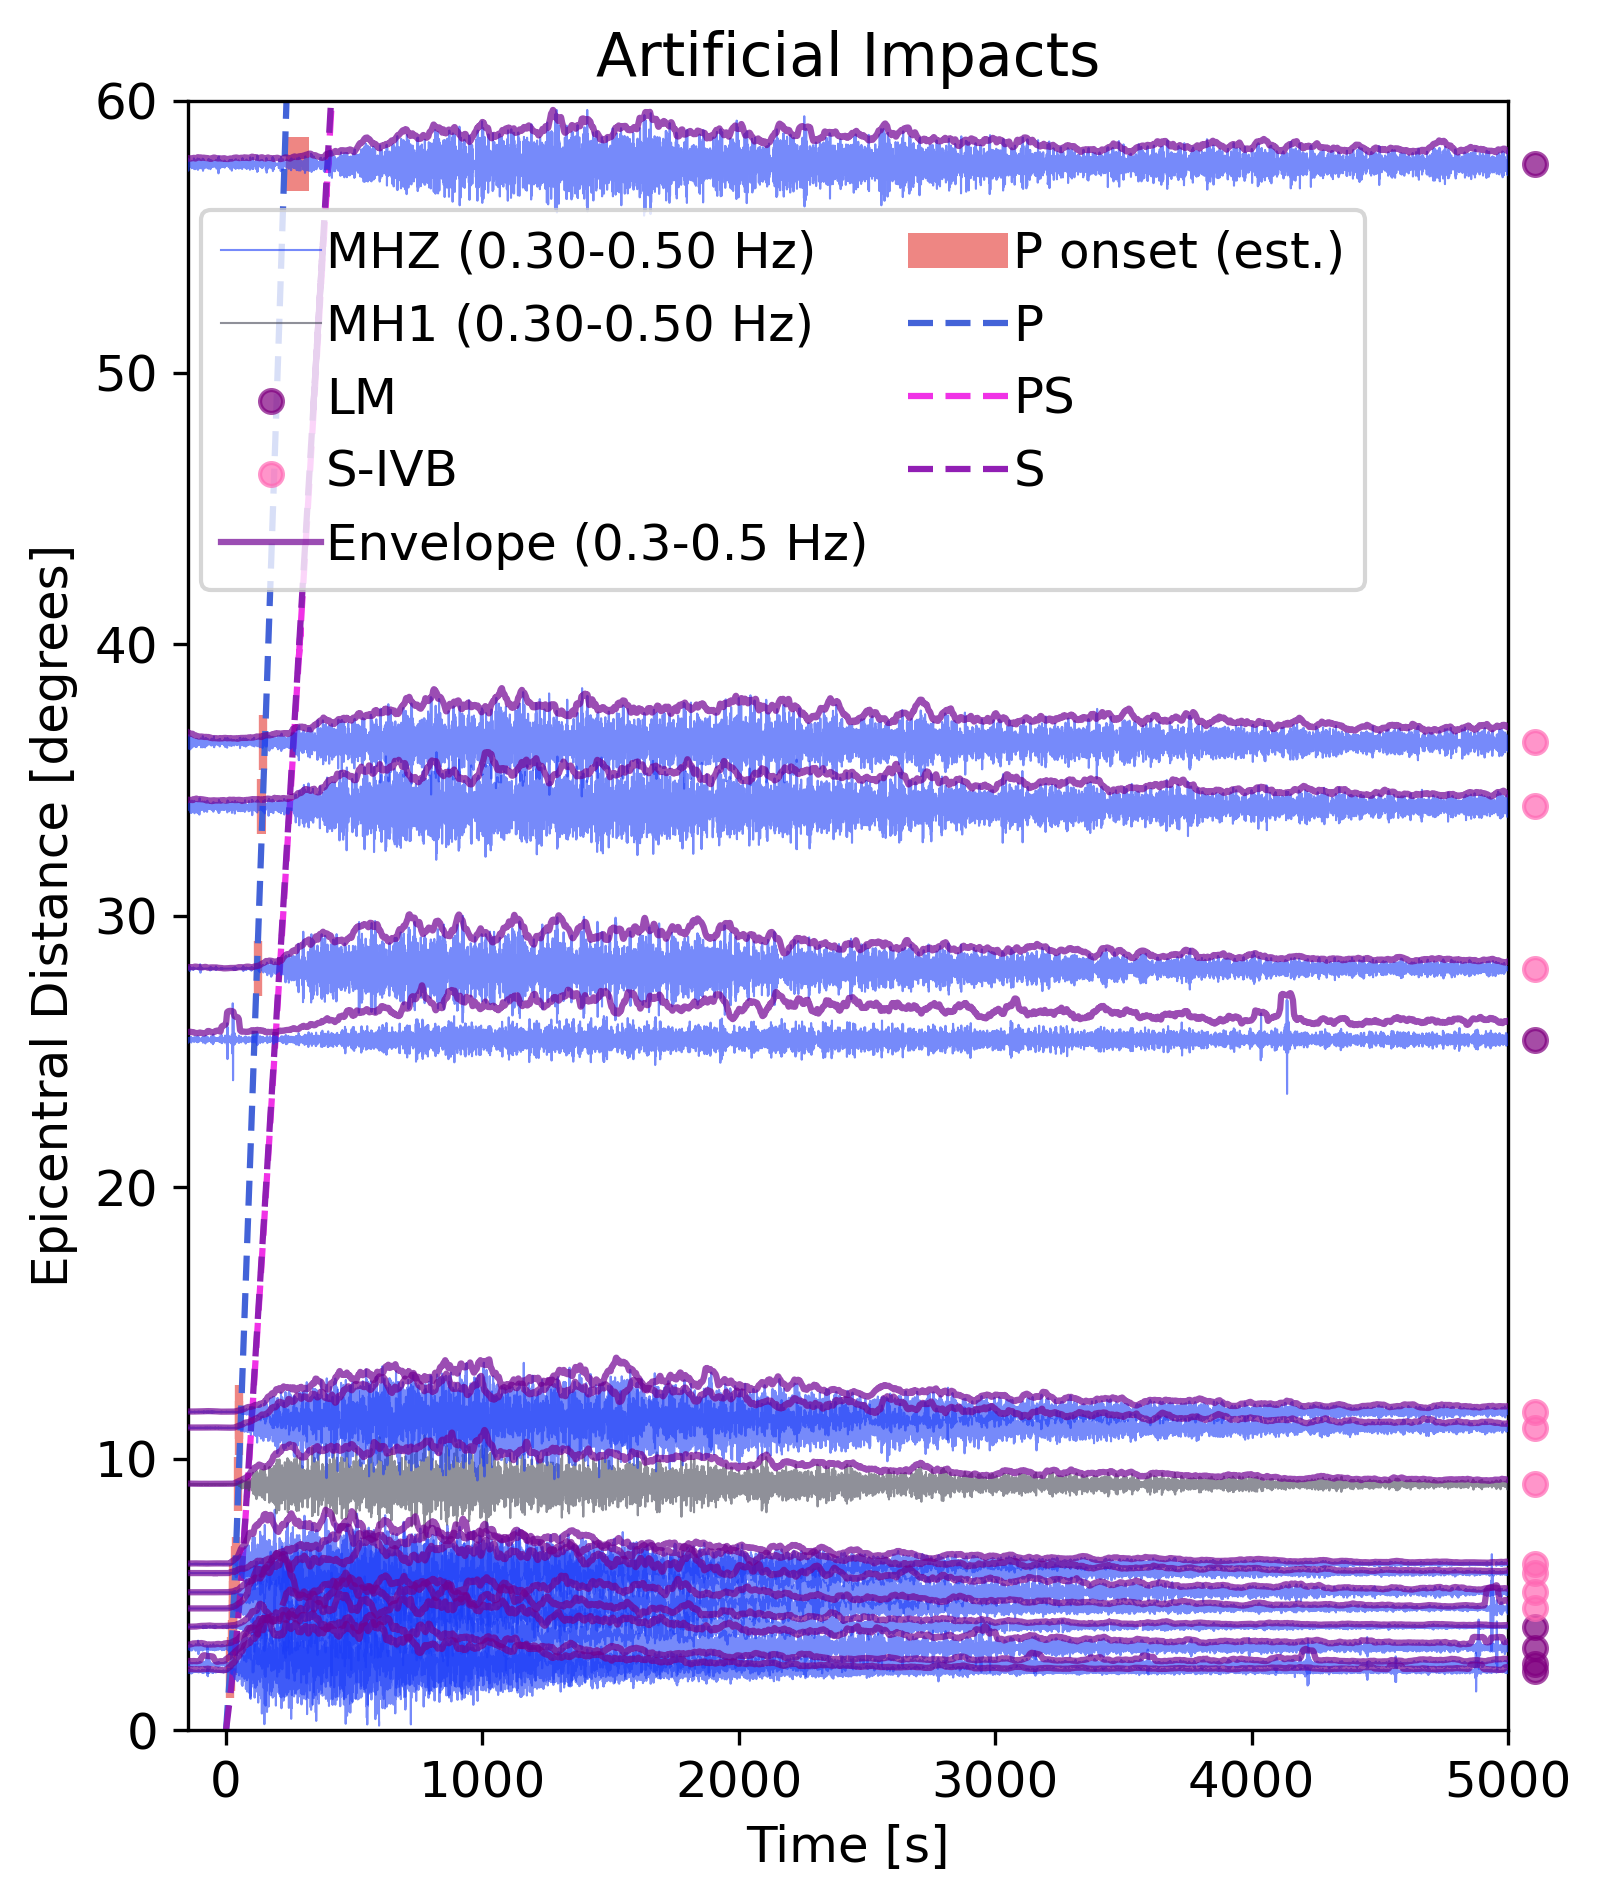

16 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:42:55.724740Z - 1971-02-07T02:08:45.762476Z | 6.6 Hz, 34120 samples (masked)
XA.S12.00.MHZ | 1969-11-20T22:14:47.704489Z - 1969-11-20T23:40:37.742225Z | 6.6 Hz, 34120 samples (masked)
XA.S15.00.MHZ | 1971-08-03T03:01:07.063432Z - 1971-08-03T04:26:56.950225Z | 6.6 Hz, 34119 samples (masked)
XA.S12.00.MHZ | 1971-02-07T00:42:55.663854Z - 1971-02-07T02:08:45.701590Z | 6.6 Hz, 34120 samples (masked)
XA.S12.00.MHZ | 1970-04-15T01:07:11.065377Z - 1970-04-15T02:33:00.952169Z | 6.6 Hz, 34119 samples
XA.S12.00.MHZ | 1972-04-19T20:59:32.933764Z - 1972-04-19T22:25:22.971500Z | 6.6 Hz, 34120 samples (masked)
XA.S12.00.MHZ | 1971-02-04T07:38:25.347893Z - 1971-02-04T09:04:15.385629Z | 6.6 Hz, 34120 samples (masked)
XA.S14.00.MHZ | 1971-07-29T20:56:12.846227Z - 1971-07-29T22:22:02.883963Z | 6.6 Hz, 34120 samples (masked)
XA.S14.00.MH1 | 1972-04-19T20:59:33.058013Z - 1972-04-19T22:25:22.944805Z | 6.6 Hz, 34119 samples (masked)
XA.S12.00.MHZ | 1972-12

In [7]:
# Figure 1(right) - Observations 

freqmin=0.3
freqmax=0.5

observation_stream = Stream()

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,2,1,
             ]
scale_list = None

# A12/LM - 1, good 
# A14/LM - 2, both good 
# A15/LM S15 92.15662242811699 3.0396554713670882, good
# A15/LM S14 1047.817818599478 34.560784470873635, not usuable on MH1, MH2, MHZ, SHZ
# A15/LM S12 1128.8982832892852 37.23510859020209, visible, not good
# A17/LM S15 771.06113458595 25.432357813795228 - usable, but not good 
# A17/LM S16 984.9465186572714 32.48706382198207 - usable, but not good 
# A17/LM S14 1597.2171064987979 52.68194068762792 - not usable in MH1, MH2, MHZ, SHZ
# A17/LM S12 1748.4673461781938 57.67071530277473 - usable, but not good 

# A13/S-IVB, ok, missing section
# A14/S-IVB, 1, excellent 
# A15/S-IVB, 2, both excellent
# A16/S-IVB, 3, all excellent, check the timing  
# A17/S-IVB, 4, 3 good, 1 good but with gaps 

# A17/LM S16 984.9465186572714 32.48706382198207
    

for tr in original_observation_stream_local_MH:
    if 'A15/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A15/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S16':
        print('Excluding A17/LM S16 - some signal')
        continue
    elif 'A15/LM' in tr.stats.title and tr.stats.station == 'S12':
        print('Excluding A15/LM S12 - maybe a very small signal')
        continue     
    elif 'A17/S-IVB' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/S-IVB S14 - some signal on MH1, especially at the start')
        continue
        
        
#     if 'S-IVB' in tr.stats.title:

#     if tr.stats.distance_in_degree > 4 and tr.stats.distance_in_degree < 10 :
    tr_copy = tr.copy()
#     and 'S-IVB' not in tr.stats.title:
    observation_stream.append(tr_copy)

#     PP_arrival
        
observation_stream.sort(keys=['distance_in_degree'])
for tr in observation_stream:
    print(tr.stats.title, tr.stats.station, tr.stats.distance_in_km, tr.stats.distance_in_degree)
plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title='Artificial Impacts',freqmin=freqmin,freqmax=freqmax,scale=2,scale_list=scale_list,taup_height=1,
                         startsecond=-150, endsecond=5000,observations=True, channel='MH*', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_observations, raw=False,
                             catalogs=catalogs,trace_title_show=False,save_fig=True,
                             seismogram_show=True,show_impact_type=True,
                              pre_filt_env=[[0.2,0.3,0.5,0.6]],
                             smooth_periods=10, plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc=(0.01,0.7),figsize=(5.5, 6.5))


Excluding A17/S-IVB S14 - some signal on MH1, especially at the start
Excluding A17/LM S16 - some signal
Excluding A15/LM-S14 - no signal
Excluding A15/LM S12 - maybe a very small signal
Excluding A17/LM-S14 - no signal
A14/LM S14 65.70014217494628 2.167025997371414
A12/LM S12 73.52970790914613 2.4252731172780972
A15/LM S15 92.15662242811699 3.0396554713670882
A14/LM S12 115.31972989656597 3.8036577155384563
A13/S-IVB S12 135.85270011450365 4.480908613215989
A16/S-IVB S12 153.86577506713317 5.075044339909034
A14/S-IVB S12 175.3535318342869 5.783787517596895
A15/S-IVB S14 185.50636664682722 6.118664372615061
A16/S-IVB S14 274.5039201750344 9.054122437295218
A17/S-IVB S12 337.50591274162565 11.13215379702135
A15/S-IVB S12 355.283128971177 11.718510058287118
A17/LM S15 771.06113458595 25.432357813795228
A17/S-IVB S16 850.3424627205593 28.047339965833054
A17/S-IVB S15 1031.3661356734635 34.01814904542429
A16/S-IVB S15 1102.8791858607765 36.37690556827287
A17/LM S12 1748.4673461781938 57.67

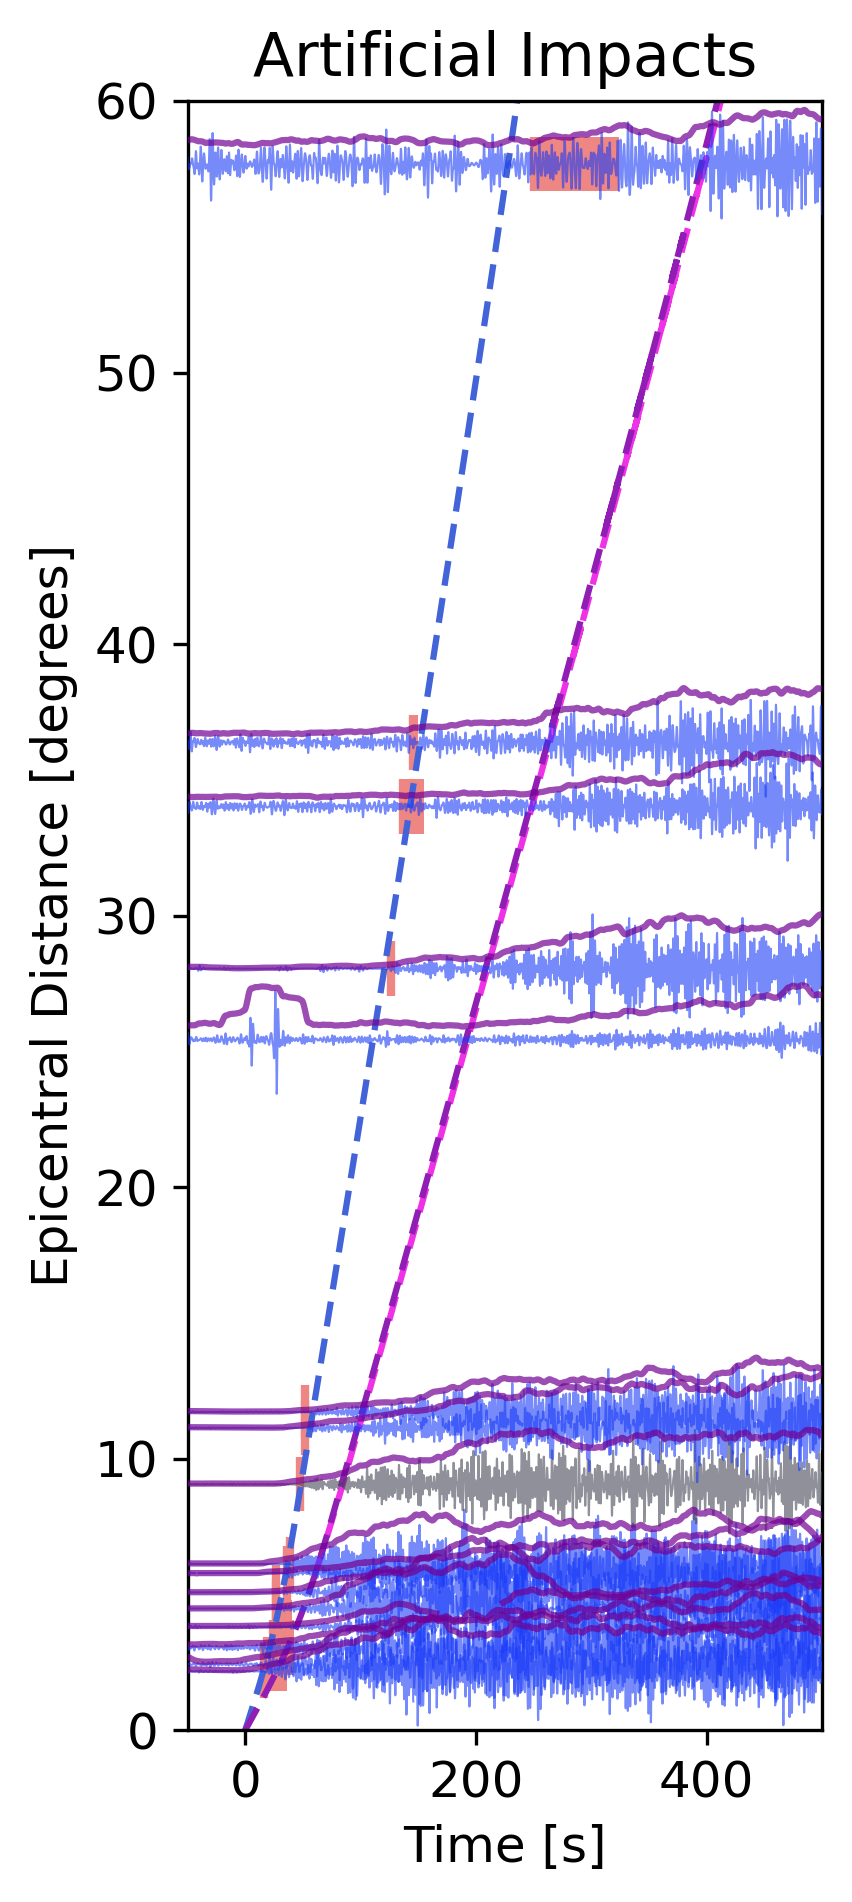

16 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:44:35.649268Z - 1971-02-07T00:53:45.687004Z | 6.6 Hz, 3645 samples (masked)
XA.S12.00.MHZ | 1969-11-20T22:16:27.629017Z - 1969-11-20T22:25:37.666753Z | 6.6 Hz, 3645 samples
XA.S15.00.MHZ | 1971-08-03T03:02:46.987960Z - 1971-08-03T03:11:57.025696Z | 6.6 Hz, 3645 samples
XA.S12.00.MHZ | 1971-02-07T00:44:35.739325Z - 1971-02-07T00:53:45.626118Z | 6.6 Hz, 3644 samples (masked)
XA.S12.00.MHZ | 1970-04-15T01:08:50.989905Z - 1970-04-15T01:18:01.027641Z | 6.6 Hz, 3645 samples
XA.S12.00.MHZ | 1972-04-19T21:01:13.009235Z - 1972-04-19T21:10:23.046971Z | 6.6 Hz, 3645 samples (masked)
XA.S12.00.MHZ | 1971-02-04T07:40:05.423364Z - 1971-02-04T07:49:15.461100Z | 6.6 Hz, 3645 samples (masked)
XA.S14.00.MHZ | 1971-07-29T20:57:52.921698Z - 1971-07-29T21:07:02.959434Z | 6.6 Hz, 3645 samples (masked)
XA.S14.00.MH1 | 1972-04-19T21:01:12.982541Z - 1972-04-19T21:10:23.020277Z | 6.6 Hz, 3645 samples (masked)
XA.S12.00.MHZ | 1972-12-10T20:31:52.296568Z - 1972

In [8]:
# Figure 1(left) - Observations - Close up
freqmin=0.3
freqmax=0.5

observation_stream = Stream()

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1,2,1,
             ]
scale_list = None

# A12/LM - 1, good 
# A14/LM - 2, both good 
# A15/LM S15 92.15662242811699 3.0396554713670882, good
# A15/LM S14 1047.817818599478 34.560784470873635, not usuable on MH1, MH2, MHZ, SHZ
# A15/LM S12 1128.8982832892852 37.23510859020209, visible, not good
# A17/LM S15 771.06113458595 25.432357813795228 - usable, but not good 
# A17/LM S16 984.9465186572714 32.48706382198207 - usable, but not good 
# A17/LM S14 1597.2171064987979 52.68194068762792 - not usable in MH1, MH2, MHZ, SHZ
# A17/LM S12 1748.4673461781938 57.67071530277473 - usable, but not good 

# A13/S-IVB, ok, missing section
# A14/S-IVB, 1, excellent 
# A15/S-IVB, 2, both excellent
# A16/S-IVB, 3, all excellent, check the timing  
# A17/S-IVB, 4, 3 good, 1 good but with gaps 

# A17/LM S16 984.9465186572714 32.48706382198207
    

for tr in original_observation_stream_local_MH:
    if 'A15/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A15/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S16':
        print('Excluding A17/LM S16 - some signal')
        continue
    elif 'A15/LM' in tr.stats.title and tr.stats.station == 'S12':
        print('Excluding A15/LM S12 - maybe a very small signal')
        continue     
    elif 'A17/S-IVB' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/S-IVB S14 - some signal on MH1, especially at the start')
        continue
        
        
#     if 'S-IVB' in tr.stats.title:

#     if tr.stats.distance_in_degree > 4 and tr.stats.distance_in_degree < 10 :
    tr_copy = tr.copy()
#     and 'S-IVB' not in tr.stats.title:
    observation_stream.append(tr_copy)

#     PP_arrival
        
observation_stream.sort(keys=['distance_in_degree'])
for tr in observation_stream:
    print(tr.stats.title, tr.stats.station, tr.stats.distance_in_km, tr.stats.distance_in_degree)
plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title='Artificial Impacts',freqmin=freqmin,freqmax=freqmax,scale=2,scale_list=scale_list,taup_height=1,
                         startsecond=-50, endsecond=500,observations=True, channel='MH*', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=phase_list_observations, raw=False,
                             catalogs=catalogs,trace_title_show=False,save_fig=True,
                             seismogram_show=True,
                              pre_filt_env=[[0.2,0.3,0.5,0.6]],
                             smooth_periods=10, plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc=(0.01,0.67),show_legend=False,
                              figsize=(3, 6.5))


Excluding A17/S-IVB S14 - some signal on MH1, especially at the start
Excluding A17/LM S16 - some signal
Excluding A15/LM-S14 - no signal
Excluding A15/LM S12 - maybe a very small signal
Excluding A17/LM-S14 - no signal
A14/LM S14 65.70014217494628 2.167025997371414
A12/LM S12 73.52970790914613 2.4252731172780972
A15/LM S15 92.15662242811699 3.0396554713670882
A14/LM S12 115.31972989656597 3.8036577155384563
A13/S-IVB S12 135.85270011450365 4.480908613215989
A16/S-IVB S12 153.86577506713317 5.075044339909034
A14/S-IVB S12 175.3535318342869 5.783787517596895
A15/S-IVB S14 185.50636664682722 6.118664372615061
A16/S-IVB S14 274.5039201750344 9.054122437295218
A17/S-IVB S12 337.50591274162565 11.13215379702135
A15/S-IVB S12 355.283128971177 11.718510058287118
Calculated using model :  Model M1
MH*
11 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:15:25.762476Z - 1971-02-07T02:15:25.611533Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1969-11-20T21:47:17.742225Z - 1969-11-20T23:47:17.591282Z 

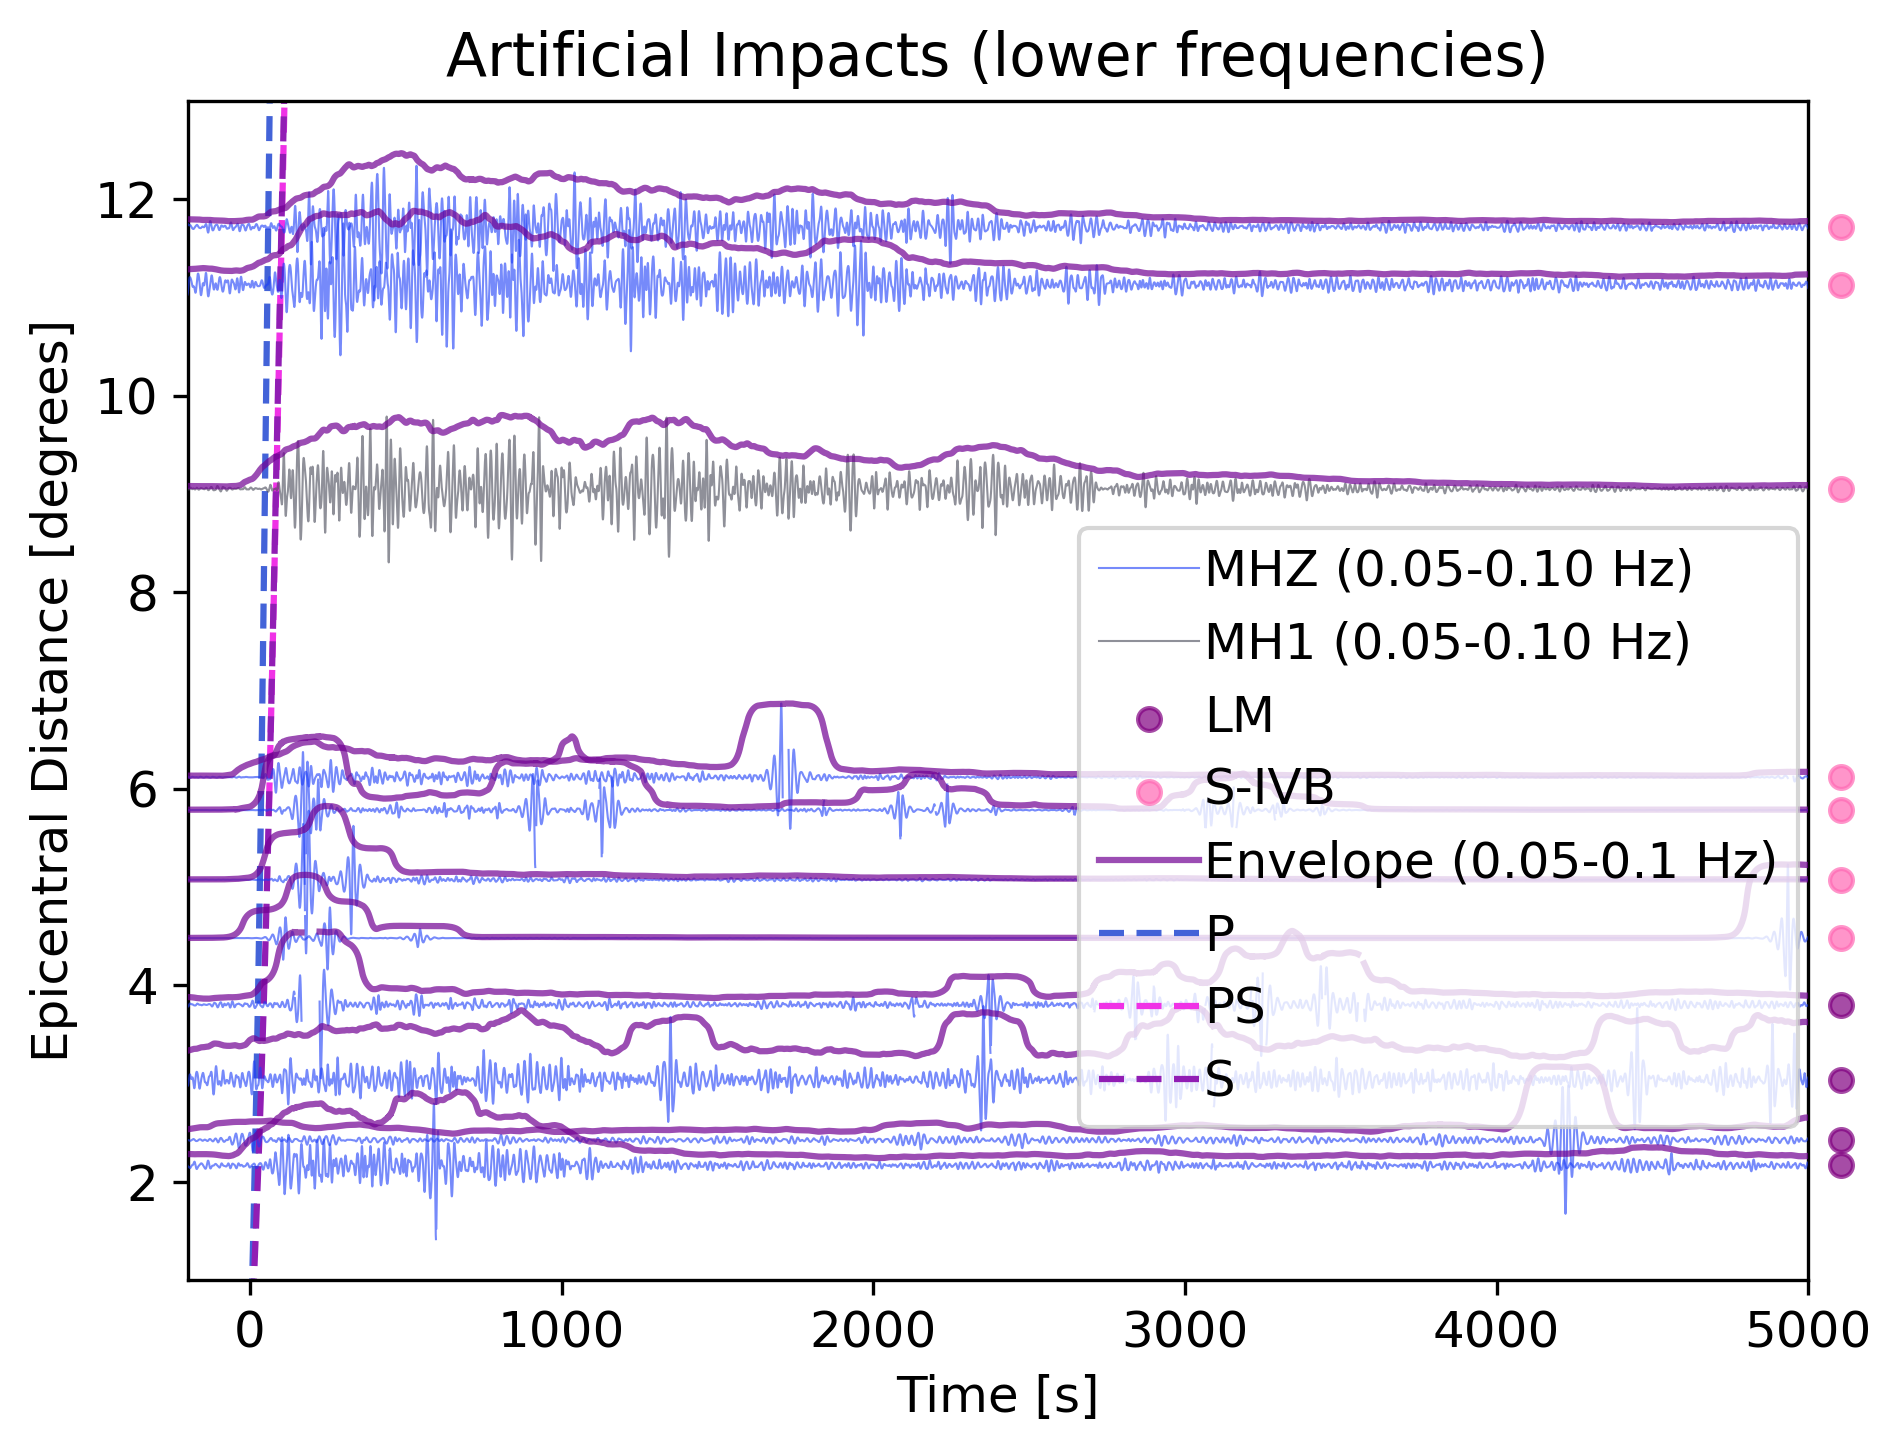

11 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:42:05.762476Z - 1971-02-07T02:08:45.762476Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1969-11-20T22:13:57.742225Z - 1969-11-20T23:40:37.742225Z | 6.6 Hz, 34451 samples (masked)
XA.S15.00.MHZ | 1971-08-03T03:00:16.950225Z - 1971-08-03T04:26:56.950225Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1971-02-07T00:42:05.701590Z - 1971-02-07T02:08:45.701590Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1970-04-15T01:06:20.952169Z - 1970-04-15T02:33:00.952169Z | 6.6 Hz, 34451 samples
XA.S12.00.MHZ | 1972-04-19T20:58:42.971500Z - 1972-04-19T22:25:22.971500Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1971-02-04T07:37:35.385629Z - 1971-02-04T09:04:15.385629Z | 6.6 Hz, 34451 samples (masked)
XA.S14.00.MHZ | 1971-07-29T20:55:22.883963Z - 1971-07-29T22:22:02.883963Z | 6.6 Hz, 34451 samples (masked)
XA.S14.00.MH1 | 1972-04-19T20:58:42.944805Z - 1972-04-19T22:25:22.944805Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1972-12

In [9]:
# Figure 2 - Observations - Lower Frequencies

freqmin=0.05
freqmax=0.1

observation_stream = Stream()

scale_list = [
        2,2,2,2,2,
        2,2,2,1,1,
        1,
             ]
scale_list = None


# A12/LM - 1, good 
# A14/LM - 2, both good 
# A15/LM S15 92.15662242811699 3.0396554713670882, good
# A15/LM S14 1047.817818599478 34.560784470873635, not usuable on MH1, MH2, MHZ, SHZ
# A15/LM S12 1128.8982832892852 37.23510859020209, visible, not good
# A17/LM S15 771.06113458595 25.432357813795228 - usable, but not good 
# A17/LM S16 984.9465186572714 32.48706382198207 - usable, but not good 
# A17/LM S14 1597.2171064987979 52.68194068762792 - not usable in MH1, MH2, MHZ, SHZ
# A17/LM S12 1748.4673461781938 57.67071530277473 - usable, but not good 

# A13/S-IVB, ok, missing section
# A14/S-IVB, 1, excellent 
# A15/S-IVB, 2, both excellent
# A16/S-IVB, 3, all excellent, check the timing  
# A17/S-IVB, 4, 3 good, 1 good but with gaps 

# A17/LM S16 984.9465186572714 32.48706382198207
    

for tr in original_observation_stream_local_MH:
    if 'A15/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A15/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S16':
        print('Excluding A17/LM S16 - some signal')
        continue
    elif 'A15/LM' in tr.stats.title and tr.stats.station == 'S12':
        print('Excluding A15/LM S12 - maybe a very small signal')
        continue     
    elif 'A17/S-IVB' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/S-IVB S14 - some signal on MH1, especially at the start')
        continue
        
        
#     if 'S-IVB' in tr.stats.title:

    if tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 15 :
        tr_copy = tr.copy()
    #     and 'S-IVB' not in tr.stats.title:
        observation_stream.append(tr_copy)

#     PP_arrival
        
observation_stream.sort(keys=['distance_in_km'])

for tr in observation_stream:
    print(tr.stats.title, tr.stats.station, tr.stats.distance_in_km, tr.stats.distance_in_degree)
plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title='Artificial Impacts (lower frequencies)',freqmin=freqmin,freqmax=freqmax,scale=0.75,scale_list=scale_list,taup_height=0.5,
                         startsecond=-200, endsecond=5000,observations=True, channel='MH*', degree_min=1, 
                              degree_max=13, normalize='relative', phase_list=phase_list_observations, raw=False,
                             catalogs=None,trace_title_show=False,show_impact_type=True,save_fig=True,
                             seismogram_show=True,
                              pre_filt_env=[[0.03,0.05,0.1,0.2]],
                             smooth_periods=10,plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc=(0.55,0.13),ncol=1,figsize=(6.5, 5))


Excluding A17/S-IVB S14 - some signal on MH1, especially at the start
Excluding A17/LM S16 - some signal
Excluding A15/LM-S14 - no signal
Excluding A15/LM S12 - maybe a very small signal
Excluding A17/LM-S14 - no signal
A14/LM S14 65.70014217494628 2.167025997371414
A12/LM S12 73.52970790914613 2.4252731172780972
A15/LM S15 92.15662242811699 3.0396554713670882
A14/LM S12 115.31972989656597 3.8036577155384563
A13/S-IVB S12 135.85270011450365 4.480908613215989
A16/S-IVB S12 153.86577506713317 5.075044339909034
A14/S-IVB S12 175.3535318342869 5.783787517596895
A15/S-IVB S14 185.50636664682722 6.118664372615061
A16/S-IVB S14 274.5039201750344 9.054122437295218
A17/S-IVB S12 337.50591274162565 11.13215379702135
A15/S-IVB S12 355.283128971177 11.718510058287118
Calculated using model :  Model M1
MH*
11 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:15:25.762476Z - 1971-02-07T02:15:25.611533Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1969-11-20T21:47:17.742225Z - 1969-11-20T23:47:17.591282Z 

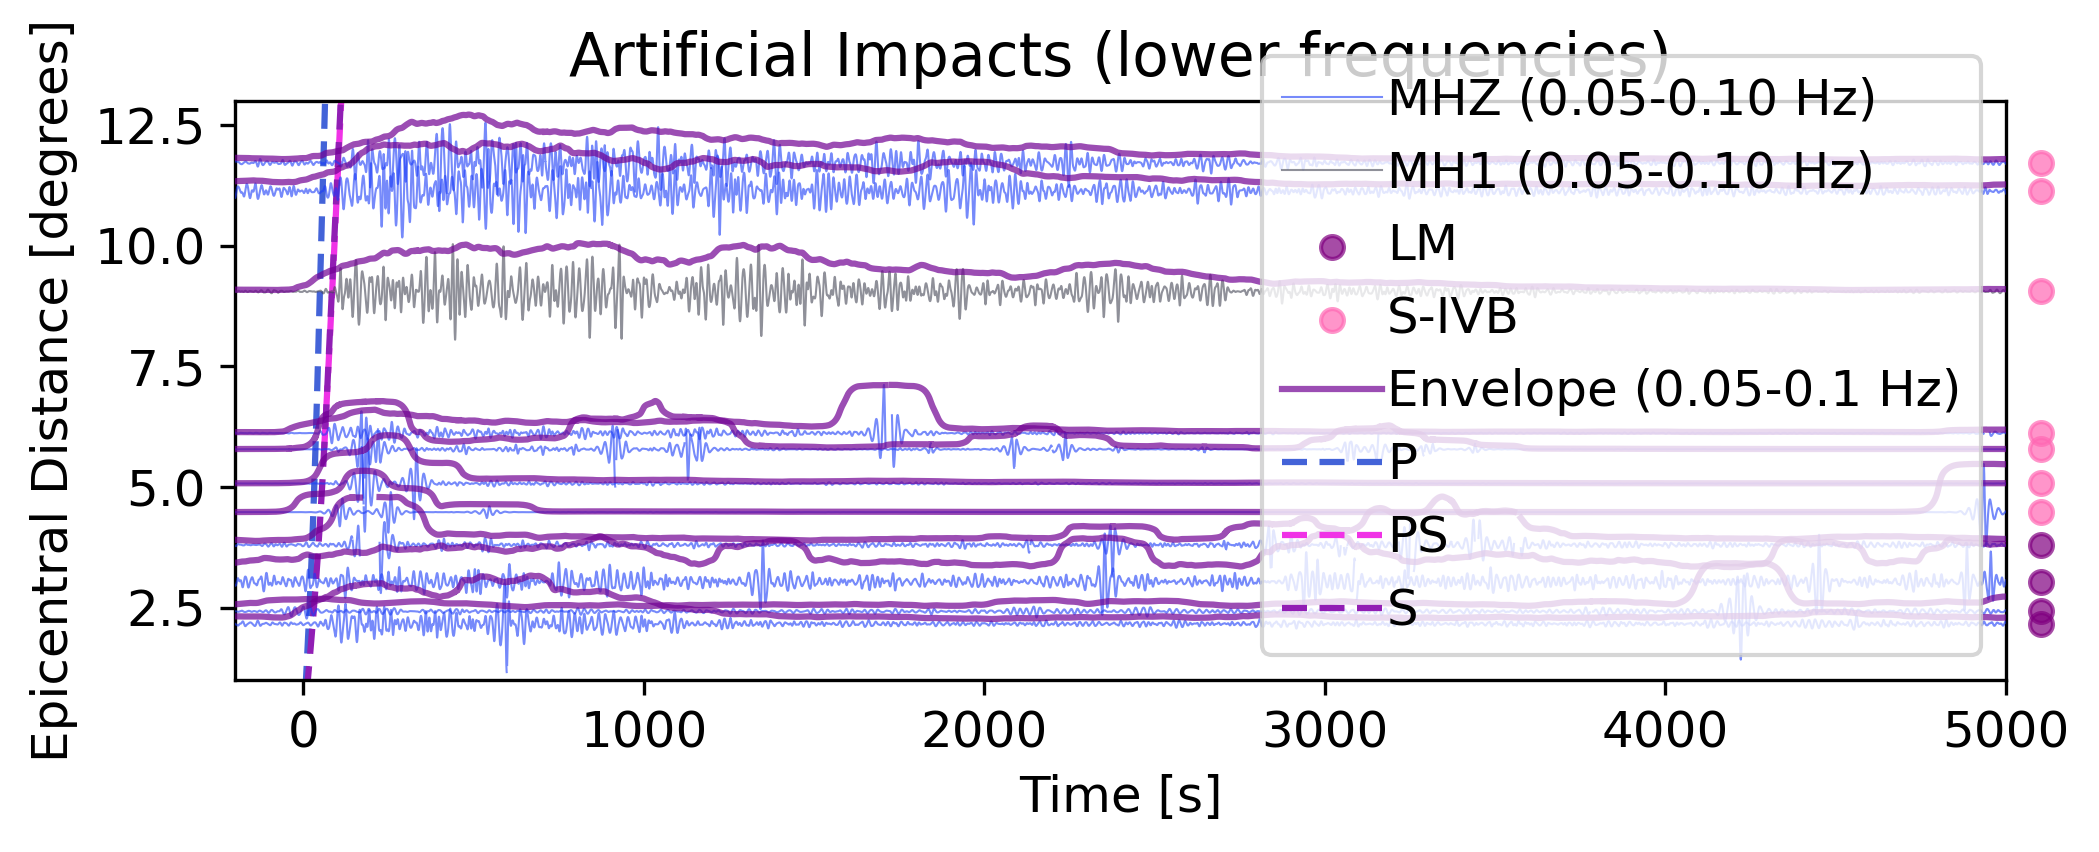

11 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:42:05.762476Z - 1971-02-07T02:08:45.762476Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1969-11-20T22:13:57.742225Z - 1969-11-20T23:40:37.742225Z | 6.6 Hz, 34451 samples (masked)
XA.S15.00.MHZ | 1971-08-03T03:00:16.950225Z - 1971-08-03T04:26:56.950225Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1971-02-07T00:42:05.701590Z - 1971-02-07T02:08:45.701590Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1970-04-15T01:06:20.952169Z - 1970-04-15T02:33:00.952169Z | 6.6 Hz, 34451 samples
XA.S12.00.MHZ | 1972-04-19T20:58:42.971500Z - 1972-04-19T22:25:22.971500Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1971-02-04T07:37:35.385629Z - 1971-02-04T09:04:15.385629Z | 6.6 Hz, 34451 samples (masked)
XA.S14.00.MHZ | 1971-07-29T20:55:22.883963Z - 1971-07-29T22:22:02.883963Z | 6.6 Hz, 34451 samples (masked)
XA.S14.00.MH1 | 1972-04-19T20:58:42.944805Z - 1972-04-19T22:25:22.944805Z | 6.6 Hz, 34451 samples (masked)
XA.S12.00.MHZ | 1972-12

In [10]:
# Figure 2 - Observations - Lower Frequencies 

freqmin=0.05
freqmax=0.1

observation_stream = Stream()

scale_list = [
        2,2,2,2,2,
        2,2,2,1,1,
        1,
             ]
scale_list = None


# A12/LM - 1, good 
# A14/LM - 2, both good 
# A15/LM S15 92.15662242811699 3.0396554713670882, good
# A15/LM S14 1047.817818599478 34.560784470873635, not usuable on MH1, MH2, MHZ, SHZ
# A15/LM S12 1128.8982832892852 37.23510859020209, visible, not good
# A17/LM S15 771.06113458595 25.432357813795228 - usable, but not good 
# A17/LM S16 984.9465186572714 32.48706382198207 - usable, but not good 
# A17/LM S14 1597.2171064987979 52.68194068762792 - not usable in MH1, MH2, MHZ, SHZ
# A17/LM S12 1748.4673461781938 57.67071530277473 - usable, but not good 

# A13/S-IVB, ok, missing section
# A14/S-IVB, 1, excellent 
# A15/S-IVB, 2, both excellent
# A16/S-IVB, 3, all excellent, check the timing  
# A17/S-IVB, 4, 3 good, 1 good but with gaps 

# A17/LM S16 984.9465186572714 32.48706382198207
    

for tr in original_observation_stream_local_MH:
    if 'A15/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A15/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S16':
        print('Excluding A17/LM S16 - some signal')
        continue
    elif 'A15/LM' in tr.stats.title and tr.stats.station == 'S12':
        print('Excluding A15/LM S12 - maybe a very small signal')
        continue     
    elif 'A17/S-IVB' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/S-IVB S14 - some signal on MH1, especially at the start')
        continue
        
        
#     if 'S-IVB' in tr.stats.title:

    if tr.stats.distance_in_degree > 0 and tr.stats.distance_in_degree < 15 :
        tr_copy = tr.copy()
    #     and 'S-IVB' not in tr.stats.title:
        observation_stream.append(tr_copy)

#     PP_arrival
        
observation_stream.sort(keys=['distance_in_km'])

for tr in observation_stream:
    print(tr.stats.title, tr.stats.station, tr.stats.distance_in_km, tr.stats.distance_in_degree)
plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],model_taup_label='Model M1',
                         title='Artificial Impacts (lower frequencies)',freqmin=freqmin,freqmax=freqmax,scale=1,scale_list=scale_list,taup_height=0.5,
                         startsecond=-200, endsecond=5000,observations=True, channel='MH*', degree_min=1, 
                              degree_max=13, normalize='relative', phase_list=phase_list_observations, raw=False,
                             catalogs=None,trace_title_show=False,show_impact_type=True,save_fig=True,
                             seismogram_show=True,
                              pre_filt_env=[[0.03,0.05,0.1,0.2]],
                             smooth_periods=10,plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc='lower right',ncol=1,figsize=(7, 3))


Excluding A17/S-IVB S14 - some signal on MH1, especially at the start
Excluding A17/LM S16 - some signal
Excluding A15/LM-S14 - no signal
Excluding A15/LM S12 - maybe a very small signal
Excluding A17/LM-S14 - no signal
A14/LM S14 65.70014217494628 2.167025997371414
A12/LM S12 73.52970790914613 2.4252731172780972
A15/LM S15 92.15662242811699 3.0396554713670882
A14/LM S12 115.31972989656597 3.8036577155384563
A13/S-IVB S12 135.85270011450365 4.480908613215989
A16/S-IVB S12 153.86577506713317 5.075044339909034
A14/S-IVB S12 175.3535318342869 5.783787517596895
A15/S-IVB S14 185.50636664682722 6.118664372615061
A16/S-IVB S14 274.5039201750344 9.054122437295218
A17/S-IVB S12 337.50591274162565 11.13215379702135
A15/S-IVB S12 355.283128971177 11.718510058287118
A17/LM S15 771.06113458595 25.432357813795228
A17/S-IVB S16 850.3424627205593 28.047339965833054
A17/S-IVB S15 1031.3661356734635 34.01814904542429
A16/S-IVB S15 1102.8791858607765 36.37690556827287
A17/LM S12 1748.4673461781938 57.67

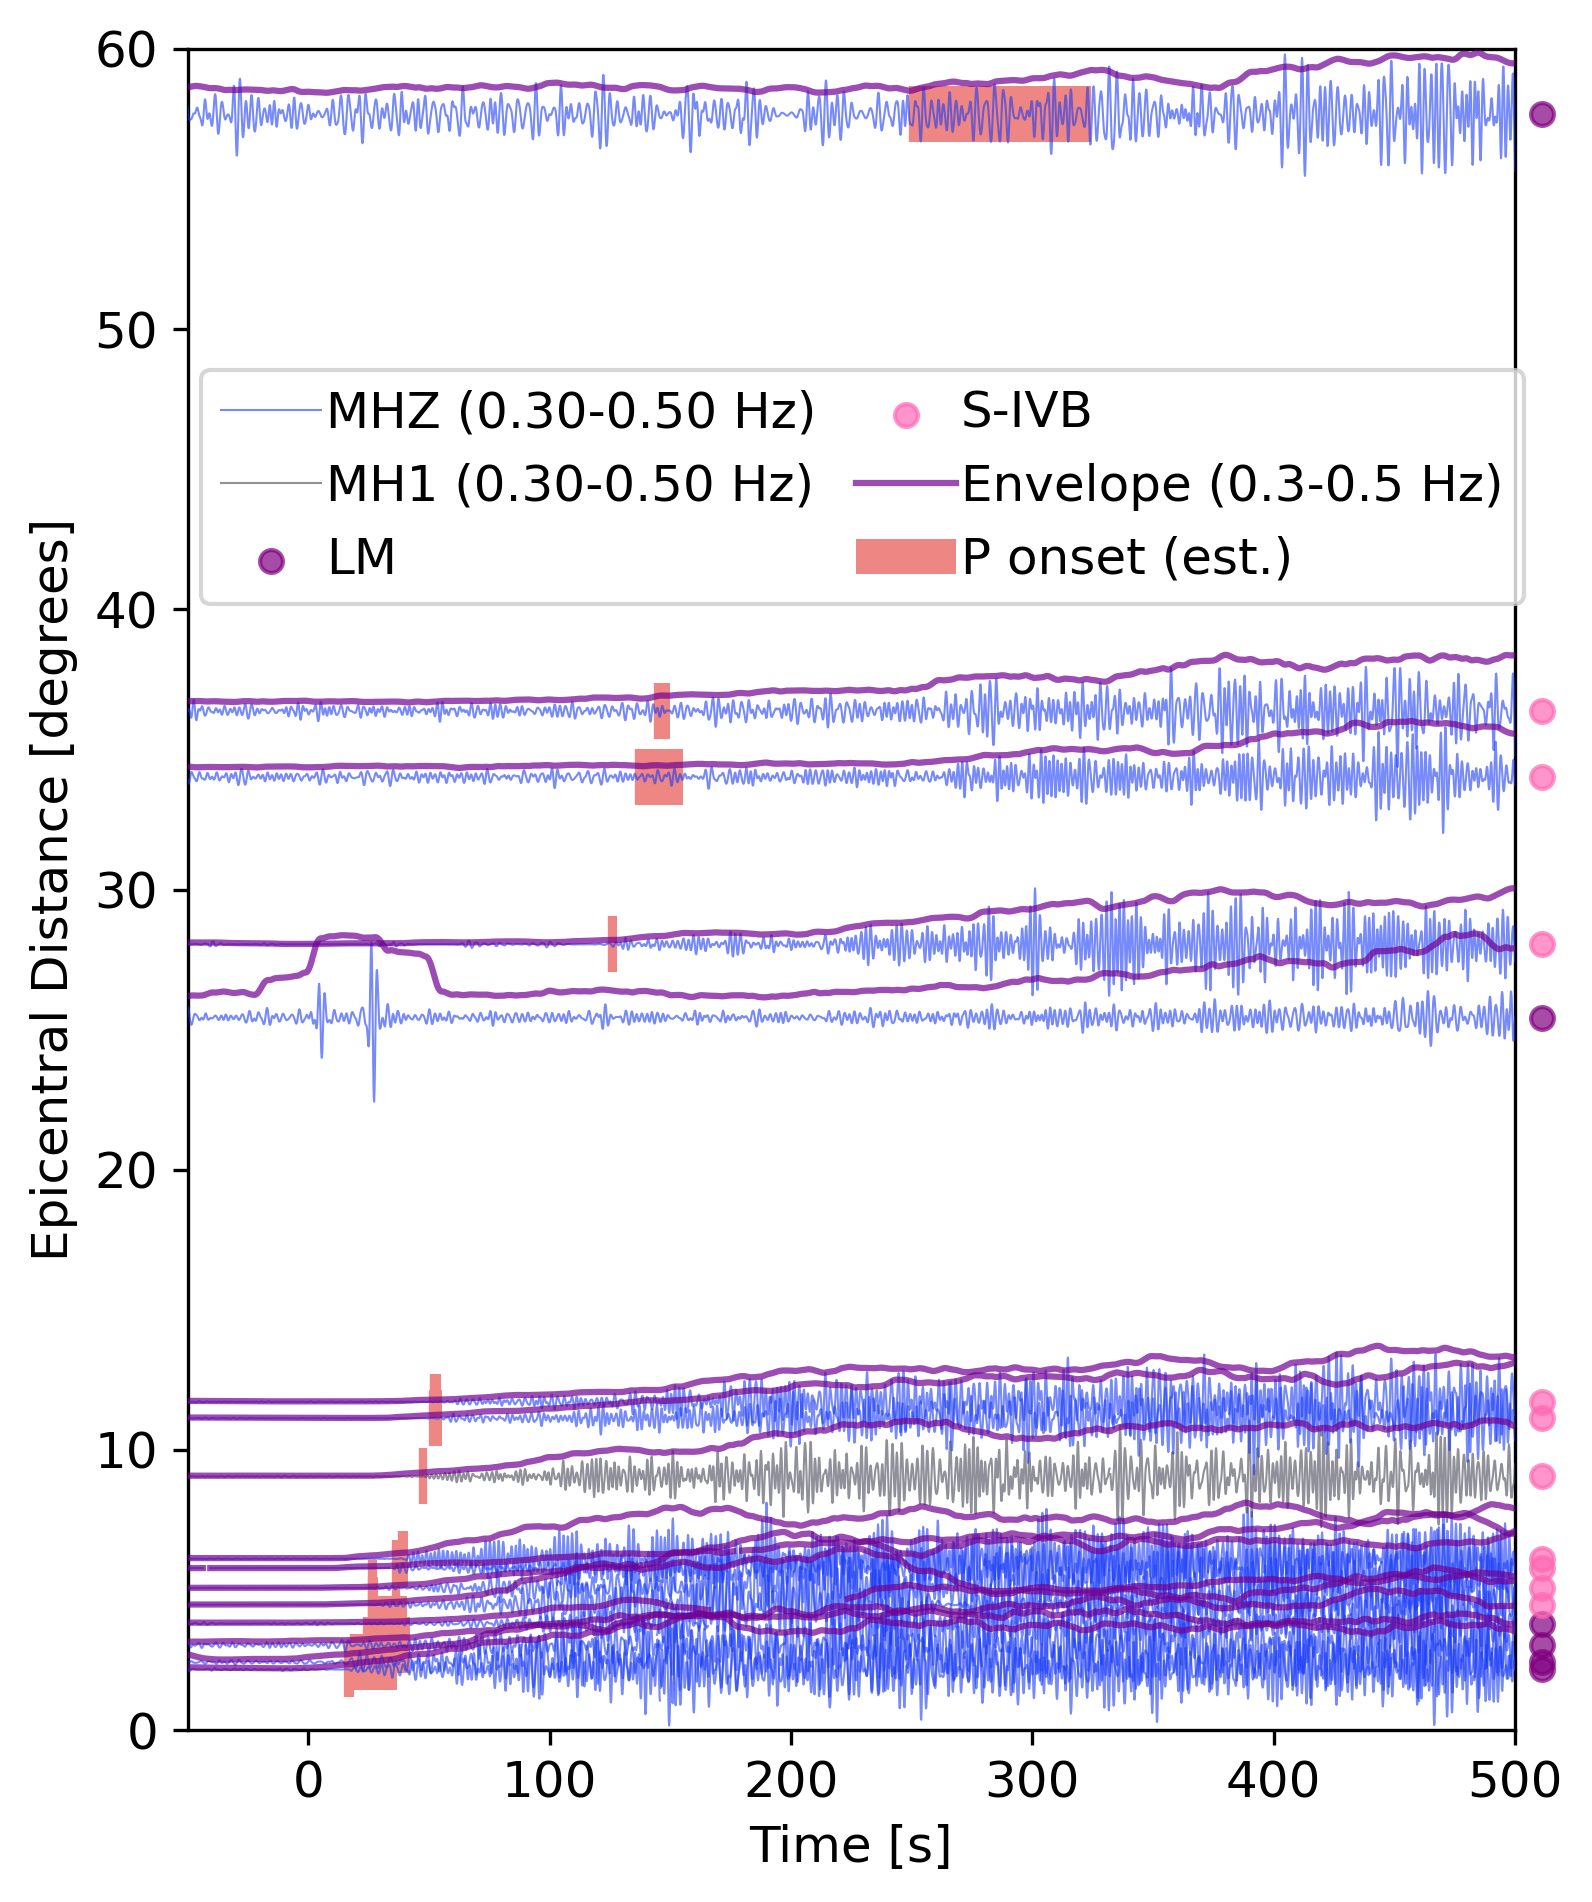

Calculated using model :  Model M1
MH*
16 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:15:25.762476Z - 1971-02-07T02:15:25.611533Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1969-11-20T21:47:17.742225Z - 1969-11-20T23:47:17.591282Z | 6.6 Hz, 47700 samples
XA.S15.00.MHZ | 1971-08-03T02:33:37.101168Z - 1971-08-03T04:33:36.950225Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1971-02-07T00:15:25.852533Z - 1971-02-07T02:15:25.550646Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1970-04-15T00:39:41.254056Z - 1970-04-15T02:39:40.952169Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1972-04-19T20:32:03.122443Z - 1972-04-19T22:32:02.971500Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1971-02-04T07:10:55.536572Z - 1971-02-04T09:10:55.234685Z | 6.6 Hz, 47699 samples
XA.S14.00.MHZ | 1971-07-29T20:28:43.034906Z - 1971-07-29T22:28:42.582076Z | 6.6 Hz, 47698 samples
XA.S14.00.MH1 | 1972-04-19T20:32:03.246692Z - 1972-04-19T22:32:02.944805Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1972-12-10T20:02:42.409776Z - 1972-12-10

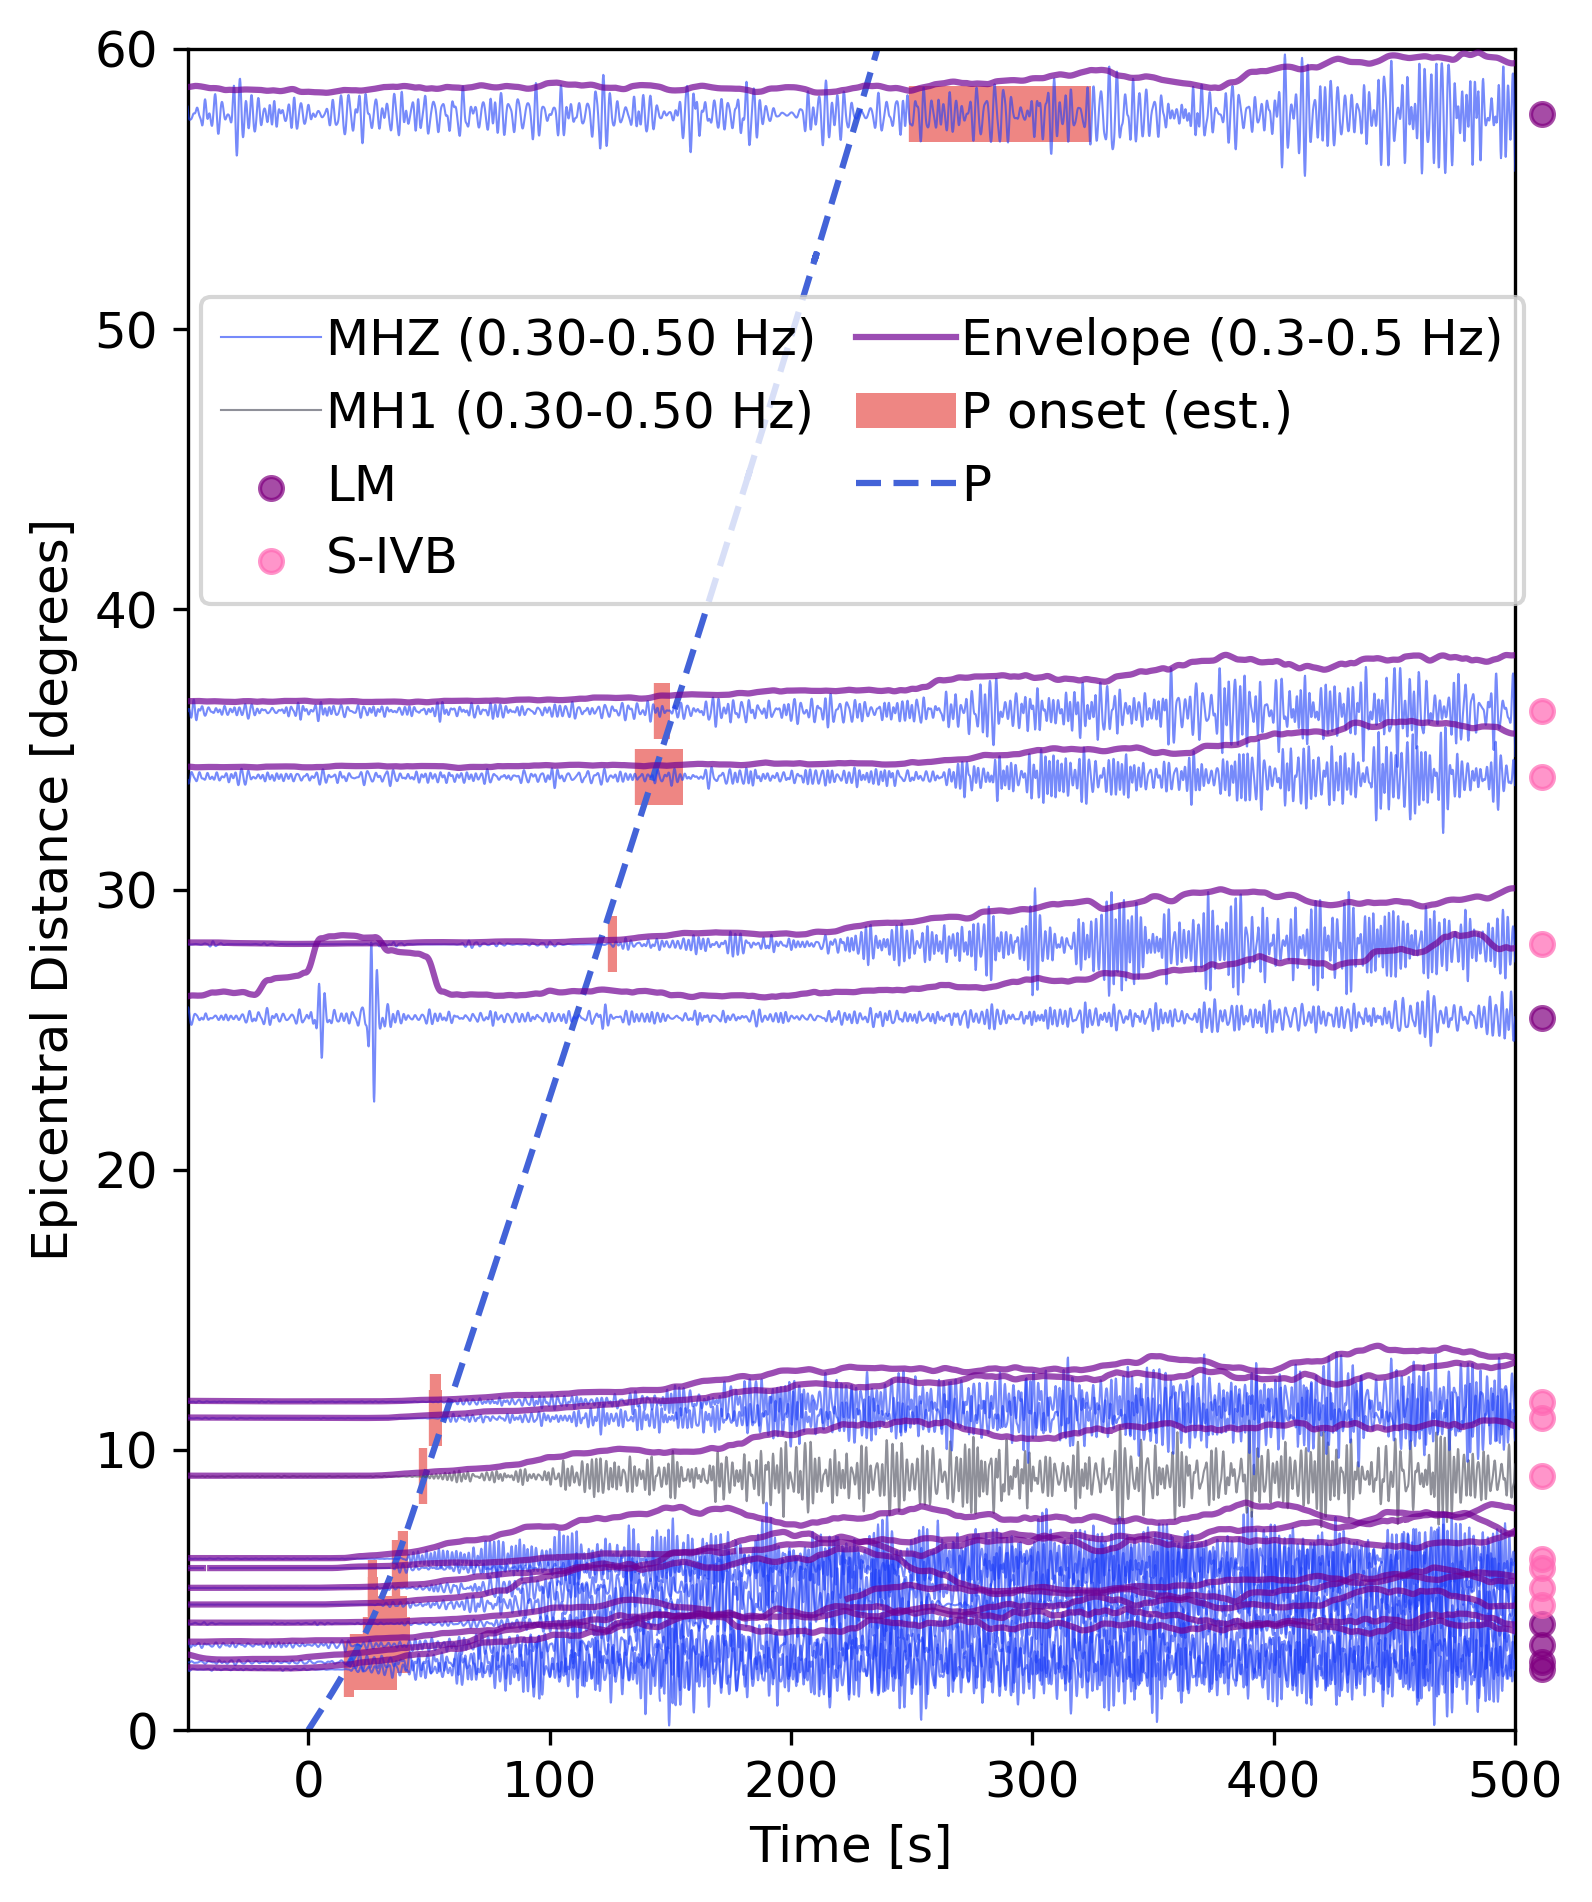

Calculated using model :  Model M1
MH*
16 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:15:25.762476Z - 1971-02-07T02:15:25.611533Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1969-11-20T21:47:17.742225Z - 1969-11-20T23:47:17.591282Z | 6.6 Hz, 47700 samples
XA.S15.00.MHZ | 1971-08-03T02:33:37.101168Z - 1971-08-03T04:33:36.950225Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1971-02-07T00:15:25.852533Z - 1971-02-07T02:15:25.550646Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1970-04-15T00:39:41.254056Z - 1970-04-15T02:39:40.952169Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1972-04-19T20:32:03.122443Z - 1972-04-19T22:32:02.971500Z | 6.6 Hz, 47700 samples
XA.S12.00.MHZ | 1971-02-04T07:10:55.536572Z - 1971-02-04T09:10:55.234685Z | 6.6 Hz, 47699 samples
XA.S14.00.MHZ | 1971-07-29T20:28:43.034906Z - 1971-07-29T22:28:42.582076Z | 6.6 Hz, 47698 samples
XA.S14.00.MH1 | 1972-04-19T20:32:03.246692Z - 1972-04-19T22:32:02.944805Z | 6.6 Hz, 47699 samples
XA.S12.00.MHZ | 1972-12-10T20:02:42.409776Z - 1972-12-10

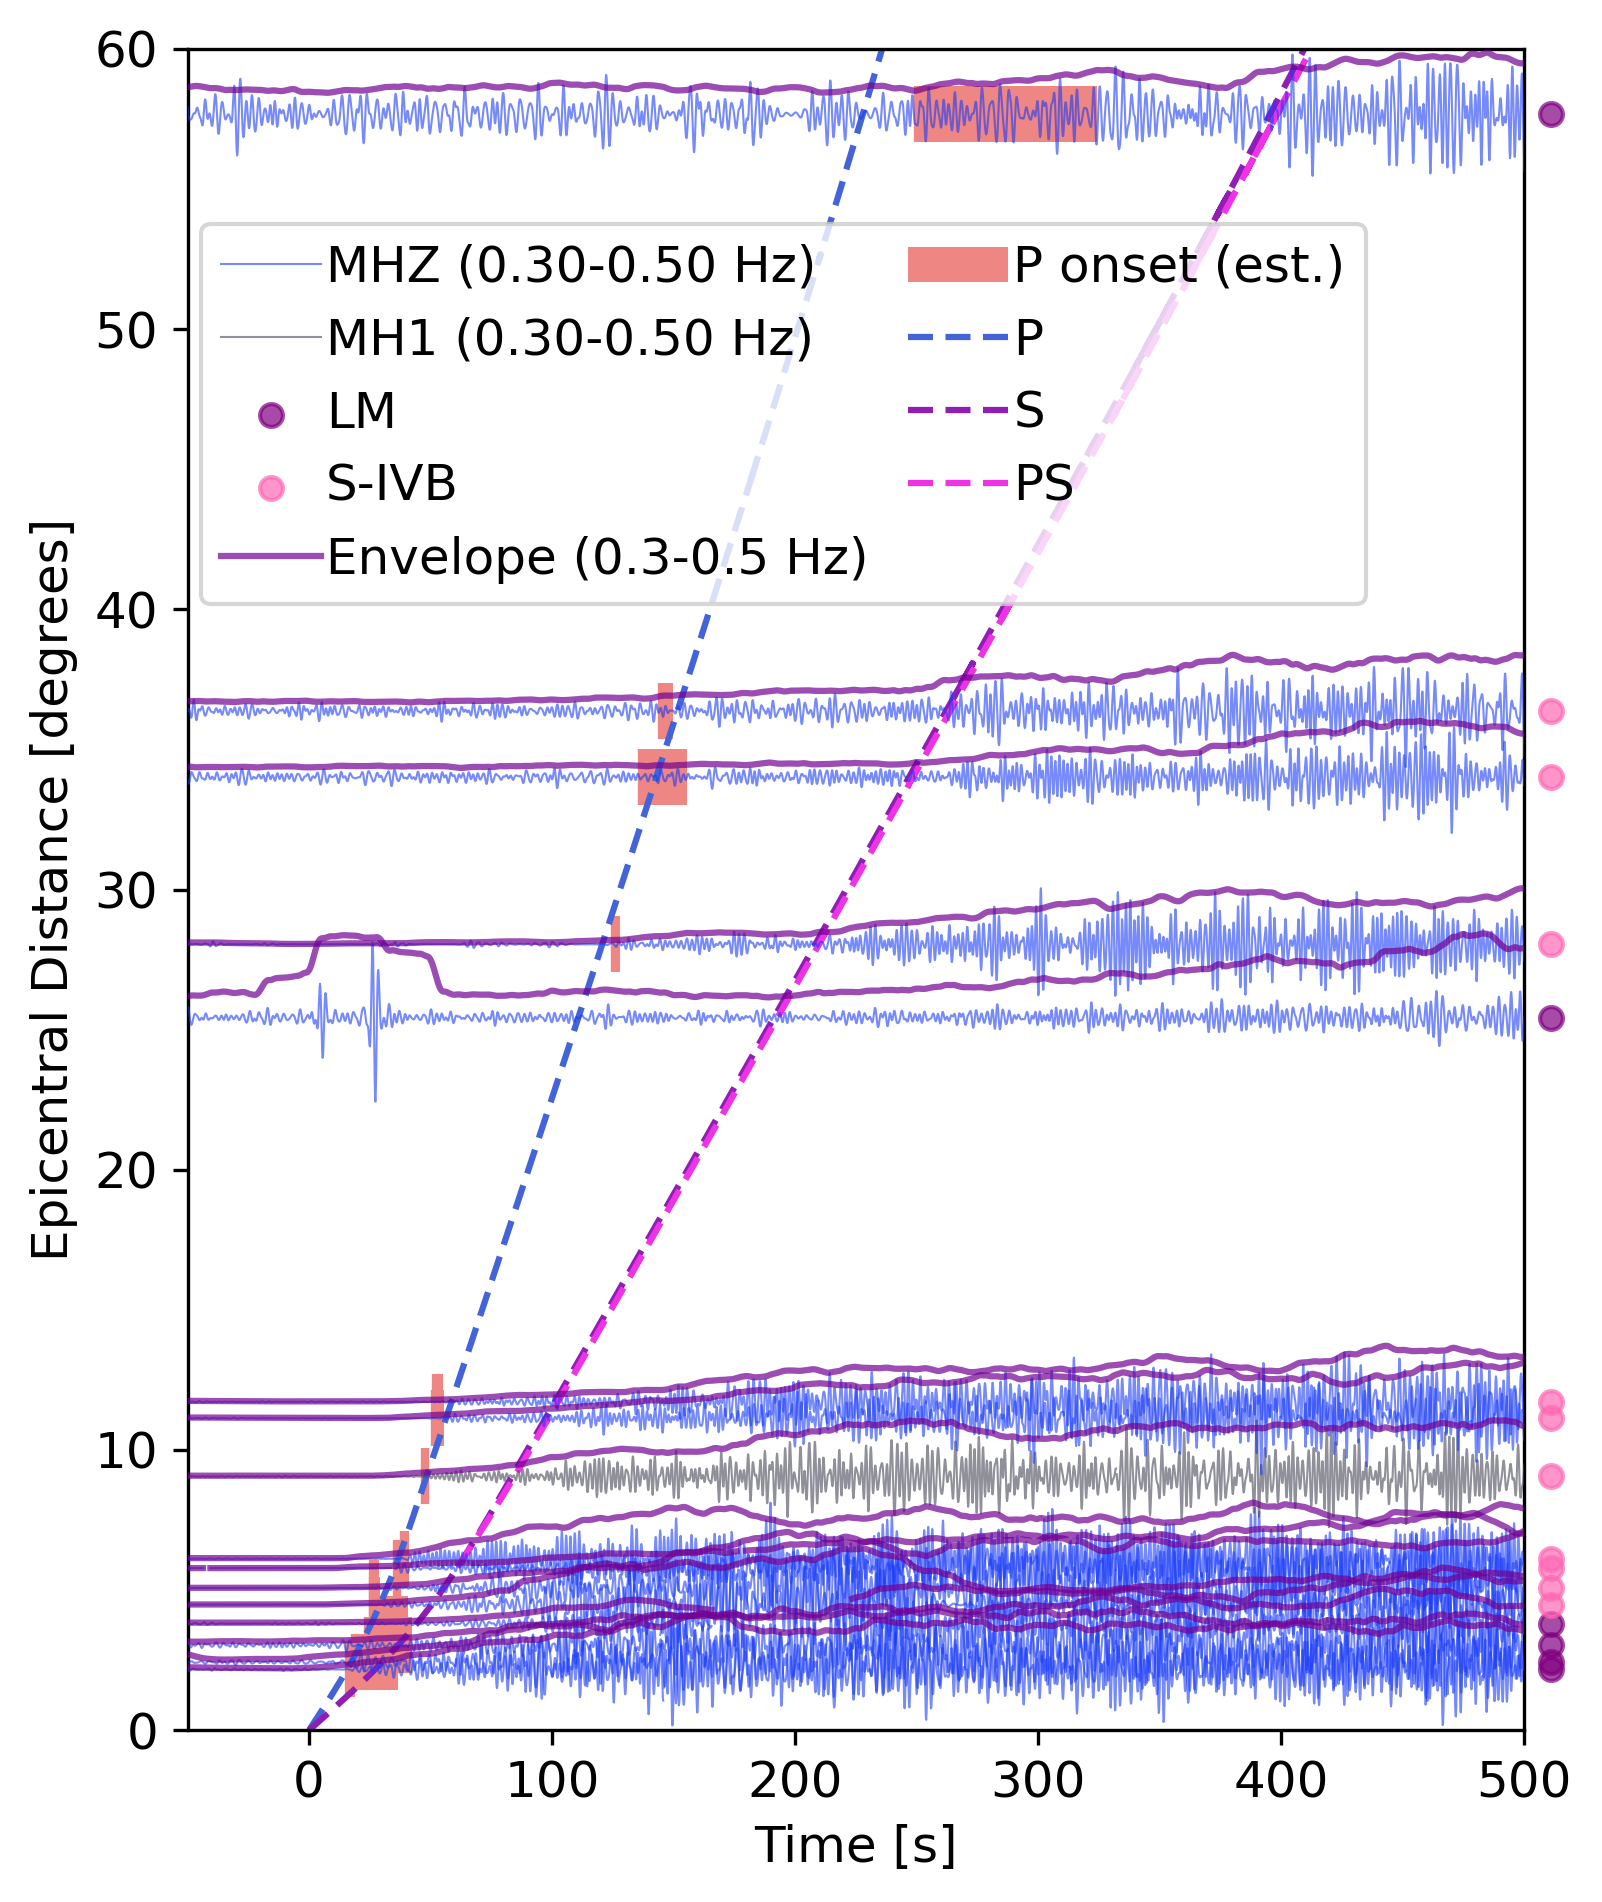

16 Trace(s) in Stream:
XA.S14.00.MHZ | 1971-02-07T00:44:35.649268Z - 1971-02-07T00:53:45.687004Z | 6.6 Hz, 3645 samples (masked)
XA.S12.00.MHZ | 1969-11-20T22:16:27.629017Z - 1969-11-20T22:25:37.666753Z | 6.6 Hz, 3645 samples
XA.S15.00.MHZ | 1971-08-03T03:02:46.987960Z - 1971-08-03T03:11:57.025696Z | 6.6 Hz, 3645 samples
XA.S12.00.MHZ | 1971-02-07T00:44:35.739325Z - 1971-02-07T00:53:45.626118Z | 6.6 Hz, 3644 samples (masked)
XA.S12.00.MHZ | 1970-04-15T01:08:50.989905Z - 1970-04-15T01:18:01.027641Z | 6.6 Hz, 3645 samples
XA.S12.00.MHZ | 1972-04-19T21:01:13.009235Z - 1972-04-19T21:10:23.046971Z | 6.6 Hz, 3645 samples (masked)
XA.S12.00.MHZ | 1971-02-04T07:40:05.423364Z - 1971-02-04T07:49:15.461100Z | 6.6 Hz, 3645 samples (masked)
XA.S14.00.MHZ | 1971-07-29T20:57:52.921698Z - 1971-07-29T21:07:02.959434Z | 6.6 Hz, 3645 samples (masked)
XA.S14.00.MH1 | 1972-04-19T21:01:12.982541Z - 1972-04-19T21:10:23.020277Z | 6.6 Hz, 3645 samples (masked)
XA.S12.00.MHZ | 1972-12-10T20:31:52.296568Z - 1972

In [11]:
# Block E1
# Observations - Electronic Supplement - Close up - No TauP and P only

freqmin=0.3
freqmax=0.5

observation_stream = Stream()

scale_list = [
        1,1,1,1,1,
        1,1,1,1,1,
        1,1.5,1,1,1,
        1.1,
             ]
# scale_list = None

# A12/LM - 1, good 
# A14/LM - 2, both good 
# A15/LM S15 92.15662242811699 3.0396554713670882, good
# A15/LM S14 1047.817818599478 34.560784470873635, not usuable on MH1, MH2, MHZ, SHZ
# A15/LM S12 1128.8982832892852 37.23510859020209, visible, not good
# A17/LM S15 771.06113458595 25.432357813795228 - usable, but not good 
# A17/LM S16 984.9465186572714 32.48706382198207 - usable, but not good 
# A17/LM S14 1597.2171064987979 52.68194068762792 - not usable in MH1, MH2, MHZ, SHZ
# A17/LM S12 1748.4673461781938 57.67071530277473 - usable, but not good 

# A13/S-IVB, ok, missing section
# A14/S-IVB, 1, excellent 
# A15/S-IVB, 2, both excellent
# A16/S-IVB, 3, all excellent, check the timing  
# A17/S-IVB, 4, 3 good, 1 good but with gaps 

# A17/LM S16 984.9465186572714 32.48706382198207
    

for tr in original_observation_stream_local_MH:
    if 'A15/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A15/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/LM-S14 - no signal')
        continue
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S16':
        print('Excluding A17/LM S16 - some signal')
        continue
    elif 'A15/LM' in tr.stats.title and tr.stats.station == 'S12':
        print('Excluding A15/LM S12 - maybe a very small signal')
        continue     
    elif 'A17/S-IVB' in tr.stats.title and tr.stats.station == 'S14':
        print('Excluding A17/S-IVB S14 - some signal on MH1, especially at the start')
        continue
        
        
#     if 'S-IVB' in tr.stats.title:

#     if tr.stats.distance_in_degree > 4 and tr.stats.distance_in_degree < 10 :
    tr_copy = tr.copy()
#     and 'S-IVB' not in tr.stats.title:
    observation_stream.append(tr_copy)

#     PP_arrival
        
observation_stream.sort(keys=['distance_in_degree'])
for tr in observation_stream:
    print(tr.stats.title, tr.stats.station, tr.stats.distance_in_km, tr.stats.distance_in_degree)
plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],taup_show=False,model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,scale=2,scale_list=scale_list,taup_height=1,
                         startsecond=-50, endsecond=500,observations=True, channel='MH*', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=[], raw=False,
                             catalogs=catalogs,trace_title_show=False,show_impact_type=True,save_fig=True,
                             seismogram_show=True,
                              pre_filt_env=[[0.2,0.3,0.5,0.6]],
                             smooth_periods=10,plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc=(0.01,0.67),show_legend=True,
                              figsize=(5.5, 6.5))


plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],taup_show=True,model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,scale=2,scale_list=scale_list,taup_height=1,
                         startsecond=-50, endsecond=500,observations=True, channel='MH*', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P"], raw=False,
                             catalogs=catalogs,trace_title_show=False,show_impact_type=True,save_fig=True,
                             seismogram_show=True,
                              pre_filt_env=[[0.2,0.3,0.5,0.6]],
                             smooth_periods=10,plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc=(0.01,0.67),show_legend=True,
                              figsize=(5.5, 6.5))


plot_epicentral_distance_taup(original_stream=observation_stream,inv=inv,model_taup=calculated_taup_dict['ISSI_MOON_M1_taup'],taup_show=True,model_taup_label='Model M1',
                         title=None,freqmin=freqmin,freqmax=freqmax,scale=2,scale_list=scale_list,taup_height=1,
                         startsecond=-50, endsecond=500,observations=True, channel='MH*', degree_min=0, 
                              degree_max=60, normalize='relative', phase_list=["P","S","PS"], raw=False,
                             catalogs=catalogs,trace_title_show=False,show_impact_type=True,save_fig=True,
                             seismogram_show=True,
                              pre_filt_env=[[0.2,0.3,0.5,0.6]],
                             smooth_periods=10,plot_envelope=True,fill_envelope=False,seismograms_vertical=False,legend_loc=(0.01,0.67),show_legend=True,
                              figsize=(5.5, 6.5))

In [12]:
# Make a table of event and distance

observation_stream = original_observation_stream_local_MH.copy()

# A12/LM - 1, good 
# A14/LM - 2, both good 
# A15/LM S15 92.15662242811699 3.0396554713670882, good
# A15/LM S14 1047.817818599478 34.560784470873635, not usuable on MH1, MH2, MHZ, SHZ
# A15/LM S12 1128.8982832892852 37.23510859020209, visible, not good
# A17/LM S15 771.06113458595 25.432357813795228 - usable, but not good 
# A17/LM S16 984.9465186572714 32.48706382198207 - usable, but not good 
# A17/LM S14 1597.2171064987979 52.68194068762792 - not usable in MH1, MH2, MHZ, SHZ
# A17/LM S12 1748.4673461781938 57.67071530277473 - usable, but not good 

# A13/S-IVB, ok, missing section
# A14/S-IVB, 1, excellent 
# A15/S-IVB, 2, both excellent
# A16/S-IVB, 3, all excellent, check the timing  
# A17/S-IVB, 4, 3 good, 1 good but with gaps 

# A17/LM S16 984.9465186572714 32.48706382198207
        
        
#     if 'S-IVB' in tr.stats.title:

#     if tr.stats.distance_in_degree > 4 and tr.stats.distance_in_degree < 10 :
#     tr_copy = tr.copy()
# #     and 'S-IVB' not in tr.stats.title:
#     observation_stream.append(tr_copy)

#     PP_arrival
        
observation_stream.sort(keys=['distance_in_degree'],reverse=True)


# THIS INCLUDES ESCAPED STRINGS
print('''
% with booktabs.
\\begin{tabular}{lll}\\toprule
\\textbf{Spacecraft} & \\textbf{Station} & \\textbf{Distance}\\\\
           \\midrule
 ''')

for tr in observation_stream:
    signal_found = ''
    station = tr.stats.station
    distance_in_degree = round(tr.stats.distance_in_degree,1)
    distance_in_km = round(tr.stats.distance_in_km,1)  
    impact = tr.stats.impact 

    if 'S-IVB' in impact:
        impact_type = 'S-IVB'
        impact_color = 'FF69B4'
    elif 'LM' in impact:
        impact_type = 'LM'
        impact_color = '800080'

    if 'A15/LM' in tr.stats.title and tr.stats.station == 'S14':
        signal_found = '*'
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S14':
        signal_found = '*'
    elif 'A17/LM' in tr.stats.title and tr.stats.station == 'S16':
        signal_found = '*'
    elif 'A15/LM' in tr.stats.title and tr.stats.station == 'S12':
        signal_found = '*'
    elif 'A17/S-IVB' in tr.stats.title and tr.stats.station == 'S14':
        signal_found = '*'


    # THIS INCLUDES ESCAPED STRINGS
    print("{{\color[HTML]{{ {0} }} {1}{5}  }}  & {2} & {3}\\textdegree\\ ({4} km) \\\\".format(impact_color, impact,station,
                    distance_in_degree,distance_in_km,signal_found))



# THIS INCLUDES ESCAPED STRINGS
print('''
\\bottomrule
\\end{tabular}
 ''')




% with booktabs.
\begin{tabular}{lll}\toprule
\textbf{Spacecraft} & \textbf{Station} & \textbf{Distance}\\
           \midrule
 
{\color[HTML]{ 800080 } A17/LM  }  & S12 & 57.7\textdegree\ (1748.5 km) \\
{\color[HTML]{ 800080 } A17/LM*  }  & S14 & 52.7\textdegree\ (1597.2 km) \\
{\color[HTML]{ 800080 } A15/LM*  }  & S12 & 37.2\textdegree\ (1128.9 km) \\
{\color[HTML]{ FF69B4 } A16/S-IVB  }  & S15 & 36.4\textdegree\ (1102.9 km) \\
{\color[HTML]{ 800080 } A15/LM*  }  & S14 & 34.6\textdegree\ (1047.8 km) \\
{\color[HTML]{ FF69B4 } A17/S-IVB  }  & S15 & 34.0\textdegree\ (1031.4 km) \\
{\color[HTML]{ 800080 } A17/LM*  }  & S16 & 32.5\textdegree\ (984.9 km) \\
{\color[HTML]{ FF69B4 } A17/S-IVB  }  & S16 & 28.0\textdegree\ (850.3 km) \\
{\color[HTML]{ 800080 } A17/LM  }  & S15 & 25.4\textdegree\ (771.1 km) \\
{\color[HTML]{ FF69B4 } A15/S-IVB  }  & S12 & 11.7\textdegree\ (355.3 km) \\
{\color[HTML]{ FF69B4 } A17/S-IVB  }  & S12 & 11.1\textdegree\ (337.5 km) \\
{\color[HTML]{ FF69B4 } A16/S-I